## Inicjalizacja


In [2]:
from laptoppriceworkflow.data import get_json_data 
from laptoppriceworkflow.functions import clean_col_meta
from laptoppriceworkflow.functions import simplify_gwarancja
from laptoppriceworkflow.functions import simplify_komunikacja

import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [3]:
df = get_json_data()

# Partycjonowanie
Preprocessing przygotowania modelu bedzie przeprowadzany tylko na czesci treningowej 
Pozniej przepuszcze przez niego czesc testowa, ktora swtorzylem oraz dodtkowy plik bez zmiennej celu

In [4]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [5]:
train.head(15)

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
70,1599.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.9,intel core i3,nowy,500.0,sprzedawcy,"13"" - 13.9"""
407,2999.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,16 gb,[windows 7 professional 64-bit],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,2.1,intel pentium dual-core,nowy,480.0,producenta,"15"" - 15.9"""
1359,2849.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.0,intel core i3,nowy,480.0,producenta,"15"" - 15.9"""
10567,2319.00,None,None,None,2,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
3203,1302.91,grafika zintegrowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.5,intel celeron dual-core,nowy,128.0,sprzedawcy,"15"" - 15.9"""
7831,1699.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.6,intel pentium quad-core,nowy,120.0,producenta,"15"" - 15.9"""
4586,1769.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.7,intel core i3,nowy,256.0,sprzedawcy,"15"" - 15.9"""
7524,5043.00,grafika dedykowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki]",ddr3,2.6,intel core i5,nowy,1000.0,producenta,"15"" - 15.9"""
10973,6519.00,grafika dedykowana,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",3840 x 2160,4,16 gb,[windows 10 home],hdd,"[klawiatura, touchpad, klawiatura podświetlana]","[kamera, głośniki, mikrofon]",ddr4,2.8,intel core i7,nowy,240.0,producenta,"15"" - 15.9"""
8158,2669.00,grafika dedykowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[brak systemu],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki]",ddr3,2.6,intel core i5,nowy,480.0,producenta,"15"" - 15.9"""


In [350]:
train["rodzaj karty graficznej"].fillna('0').map(lambda x: x.split("grafika")[-1].strip())

70       zintegrowana
407      zintegrowana
1359     zintegrowana
10567               0
3203     zintegrowana
             ...     
6406       dedykowana
10541    zintegrowana
8281                0
8053       dedykowana
5978       dedykowana
Name: rodzaj karty graficznej, Length: 5924, dtype: object

# Wstępna Analiza

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 70 to 5978
Data columns (total 17 columns):
buynow_price                         5924 non-null float64
rodzaj karty graficznej              5540 non-null object
komunikacja                          5322 non-null object
rozdzielczość (piksele)              5465 non-null object
liczba rdzeni procesora              5924 non-null object
wielkość pamięci ram                 5572 non-null object
system operacyjny                    5420 non-null object
typ dysku twardego                   5589 non-null object
sterowanie                           5402 non-null object
multimedia                           5375 non-null object
typ pamięci ram                      5253 non-null object
taktowanie bazowe procesora (ghz)    5212 non-null float64
seria procesora                      5520 non-null object
stan                                 5924 non-null object
pojemność dysku (gb)                 5557 non-null float64
gwarancja          

In [7]:
train.isnull().sum()/train.shape[0]

buynow_price                         0.000000
rodzaj karty graficznej              0.064821
komunikacja                          0.101621
rozdzielczość (piksele)              0.077481
liczba rdzeni procesora              0.000000
wielkość pamięci ram                 0.059419
system operacyjny                    0.085078
typ dysku twardego                   0.056550
sterowanie                           0.088116
multimedia                           0.092674
typ pamięci ram                      0.113268
taktowanie bazowe procesora (ghz)    0.120189
seria procesora                      0.068197
stan                                 0.000000
pojemność dysku (gb)                 0.061951
gwarancja                            0.000000
wielkość matrycy                     0.044733
dtype: float64

In [28]:
# Funkcja sprawdzajaca liczbe kategorii w kolumnie

for col_name in train.columns:
    if train[col_name].dtypes == 'object':
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories" .format(
            col_name =col_name, unique_cat = unique_cat))

Feature 'rodzaj karty graficznej' has 3 unique categories


TypeError: unhashable type: 'list'

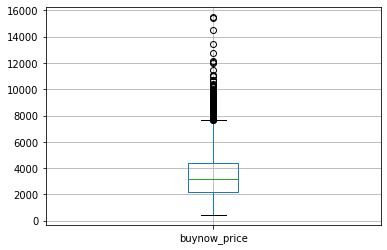

In [7]:
train.boxplot("buynow_price")

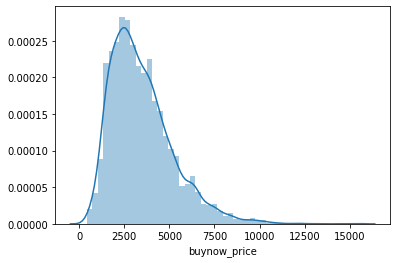

In [8]:
sns.distplot(train["buynow_price"])
plt.show()

# Budowa Preprocesingu

In [8]:
train_num = train[['taktowanie bazowe procesora (ghz)', 'pojemność dysku (gb)', 'wielkość pamięci ram']]

In [9]:
train[['taktowanie bazowe procesora (ghz)', 'pojemność dysku (gb)', 'wielkość pamięci ram']].head(15)

,taktowanie bazowe procesora (ghz),pojemność dysku (gb),wielkość pamięci ram
70,1.9,500.0,8 gb
407,2.1,480.0,16 gb
1359,2.0,480.0,8 gb
10567,NaN,NaN,None
3203,1.5,128.0,8 gb
7831,1.6,120.0,4 gb
4586,1.7,256.0,8 gb
7524,2.6,1000.0,8 gb
10973,2.8,240.0,16 gb
8158,2.6,480.0,8 gb


imputer = SimpleImputer(strategy = 'median')
imputer.fit(df_num)
imputer.statistics_

X = imputer.transform(df_num)
df_num_imp = pd.DataFrame(X, columns=df_num.columns)


encoder = LabelEncoder()
#df_cat = df[["rodzaj karty graficznej", "komunikacja","rozdzielczość (piksele)"]]
df_cat = df["liczba rdzeni procesora"]
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded

Lepsze gdy w kolumnie masz bardzo dużo kategorii i powstaje macierz rzadka (sparse matrix)
W innym przypadku lepiej LabelBinarizer() :)

In [351]:
class FeatureEng(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #imm = joblib.load(PATH_TO_IMM)
        #metadata_dense = reduce_mem_usage(pd.read_csv(METADATA_DENSE).fillna(0))
        X["country"] = X["city"].map(lambda x: x.split(",")[-1].strip())
        X["komunikacja"]
        
        for genre in set.union(*df.genre.apply(set)):
    df[genre] = df.apply(lambda _: int(_.genre.count(genre)), axis=1)
        
        return X

In [353]:
from sklearn.preprocessing import MultiLabelBinarizer

In [373]:
train["komunikacja"].head()

70       [wi-fi, bluetooth, lan 10/100/1000 mbps]
407      [wi-fi, bluetooth, lan 10/100/1000 mbps]
1359     [wi-fi, bluetooth, lan 10/100/1000 mbps]
10567                                        None
3203                 [bluetooth, lan 10/100 mbps]
Name: komunikacja, dtype: object

In [374]:
mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(train["komunikacja"][0:4])
labelClasses = mlb.classes_
#labelClasses

# Create a pandas.DataFrame from our output
expandedLabels = pd.DataFrame(expandedLabelData, columns=labelClasses)

TypeError: 'NoneType' object is not iterable

In [372]:
expandedLabels

,bluetooth,lan 10/100/1000 mbps,wi-fi
0,1,1,1
1,1,1,1
2,1,1,1


In [352]:
train["komunikacja"].apply(pd.Series).stack().unique().tolist()

['wi-fi',
 'bluetooth',
 'lan 10/100/1000 mbps',
 'lan 10/100 mbps',
 'intel wireless display (widi)',
 'nfc (near field communication)',
 'modem 3g (wwan)',
 'gps',
 'wi-fi 802.11 b/g/n/ac',
 'modem 4g (lte)',
 'wi-fi 802.11 b/g/n',
 'wi-fi 802.11 a/b/g/n/ac',
 'wi-fi 802.11 a/b/g/n']

In [ ]:
count_komunikacja_item = {}
    #for i in train["komunikacja"].apply(pd.Series).stack().unique().tolist():
    #    temp_ = (df["komunikacja_t"].str.contains(i, regex=False)*1).sum()
    #    count_komunikacja_item[i]= temp_
for i in train["komunikacja"].apply(pd.Series).stack().unique().tolist():
    df[i] = (df["komunikacja_t"].str.contains(i, regex=False)*1).fillna(0)   

In [300]:
class DataFrameImputer(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
        
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else np.NaN for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X[self.attribute_names].fillna(self.fill).values

In [309]:
#rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

#buynow_price_ix, taktowanie_bazowe_procesora_ghz_ix, pojemność_dysku_gb_ix = 0, 1, 2
wielkosc_pamieci_ram_ix = 2

class CombinedAttributesAdder_num(BaseEstimator, TransformerMixin):
    
    def __init__(self, wielkosc_pamiec_ram = True): # żadnych zmiennych *args ani **kargs
        self._wielkosc_pamiec_ram = wielkosc_pamiec_ram
    
    def fit(self, X, y=None):
        return self # nie robi nic innego
    
    def transform(self, X, y=None):
        if self._wielkosc_pamiec_ram:
            
            #create new column
            wielkosc_pamieci_ram_trans = [0 if "mb" in x else int(x.strip('gb')) for x in X[:, wielkosc_pamieci_ram_ix]]
            
            #drop redundant column
            X = np.delete(X, np.s_[wielkosc_pamieci_ram_ix], 1)
            
            
            return np.c_[wielkosc_pamieci_ram_trans, X]
        else:
            return X

In [171]:
attr_adder = CombinedAttributesAdder(add_price_per_gb=True)
df_extra_attribs = attr_adder.transform(df.values)

In [62]:
gwarancja_ix = 0
rozdzielczosc_ix = 3
liczba_rdzeni_proc_ix = 4
seria_procesora_ix = 5

class CombinedAttributesAdder_cat(BaseEstimator, TransformerMixin):
                 
    def __init__(self, gwarancja_trans = True):
        self._gwarancja_trans = gwarancja_trans
        self._trans_gwrancja = trans_gwarancja
        self._trans_gwrancja = trans_gwarancja
        self._trans_gwrancja = trans_gwarancja
    
    def fit(self, X, y = None):
        return self # nie robi nic innego
    
    def transform(self, X, y = None):
        if self._gwarancja_trans:
            gwarancja_trans = ['producenta' if x == 'producenta' else 'other' for x in X[:, gwarancja_ix]]
            X = np.delete(X, np.s_[gwarancja_ix, rozdzielczosc_ix, liczba_rdzeni_proc_ix, seria_procesora_ix], 1)
            
            rozdzielczosc_trans = ['1920 x 1080' if x == '1920 x 1080' else '1366 x 768' if x == '1366 x 768' else 'other' for x in X[:, rozdzielczosc_ix]]
            X = np.delete(X, np.s_[gwarancja_ix, rozdzielczosc_ix, liczba_rdzeni_proc_ix, seria_procesora_ix], 1)
            
            liczba_rdzeni_proc_trans = ['2' if x == '2' else 'other' for x in X[:, liczba_rdzeni_proc_ix]]
            X = np.delete(X, np.s_[gwarancja_ix, rozdzielczosc_ix, liczba_rdzeni_proc_ix, seria_procesora_ix], 1)
            
            seria_procesora_trans = ['intel core i7' if x == 'intel core i7 ' else 'intel core i5' if x == 'intel core i5' else 'intel core i3' if x == 'intel core i3' else 'other' for x in X[:,seria_procesora_ix]]
            X = np.delete(X, np.s_[gwarancja_ix, rozdzielczosc_ix, liczba_rdzeni_proc_ix, seria_procesora_ix], 1)
                               
         #   return np.c_[np.asarray(gwarancja_trans).reshape(-1,1), rozdzielczosc_trans, liczba_rdzeni_proc_trans, seria_procesora_trans, X]
        #else:
            return X

In [284]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [330]:
cat_attribs = list(["gwarancja", "typ dysku twardego","rodzaj karty graficznej", "rozdzielczość (piksele)", "liczba rdzeni procesora", 'seria procesora'])
num_attribs = list(train_num)
#dd = list(['pojemność dysku (gb)', 'gwarancja'])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('imputerr', SimpleImputer(missing_values=None, strategy="most_frequent")),
    #('attribs_adder_cat',CombinedAttributesAdder_cat()),
    #('cat_encoder', OneHotEncoder(sparse=False)),
    ])

num_pipeline = Pipeline([
    ('Imputer_cat', DataFrameImputer(num_attribs)),
    #('selector', DataFrameSelector(num_attribs)),
    #('imputer', SimpleImputer(strategy="constant", fill_value=None)),
    ('attribs_adder_num', CombinedAttributesAdder_num()),
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler()),
    ])

In [346]:
test_data["pojemność dysku (gb)"].map(str)

70        500.0
407       480.0
1359      480.0
10567      32.0
3203      128.0
          ...  
6406     1000.0
10541     128.0
8281       32.0
8053      128.0
5978      128.0
Name: pojemność dysku (gb), Length: 5924, dtype: object

In [331]:
#tt = num_pipeline.fit_transform(train[0:2])
#tt = num_pipeline.fit_transform(train[['pojemność dysku (gb)', 'gwarancja']])
#tt = num_pipeline.fit_transform(train)


#.fit_transform
ttt = cat_pipeline.fit_transform(train)

In [332]:
ttt

array([['sprzedawcy', 'hdd', 'grafika zintegrowana', '1366 x 768', '2',
        'intel core i3'],
       ['producenta', 'ssd', 'grafika zintegrowana', '1366 x 768', '2',
        'intel pentium dual-core'],
       ['producenta', 'ssd', 'grafika zintegrowana', '1920 x 1080', '2',
        'intel core i3'],
       ...,
       ['producenta', 'ssd', 'grafika dedykowana', '1920 x 1080', '2',
        'intel core i5'],
       ['sprzedawcy', 'ssd', 'grafika dedykowana', '1920 x 1080', '2',
        'intel core i5'],
       ['producenta', 'ssd', 'grafika dedykowana', '1920 x 1080', '2',
        'intel core i3']], dtype=object)

In [316]:
full_pipeline = FeatureUnion(transformer_list=[
    ("cat_pipeline", cat_pipeline),
    ("num_pipeline", num_pipeline),
])

In [317]:
housing_prepared = full_pipeline.fit_transform(train)
housing_prepared[0:6]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        , -0.2607585 , -1.18450975, -0.33657005],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.99003772, -0.64048825, -0.38094826],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        , -0.2607585 , -0.912499  , -0.38094826],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  

In [55]:
#pd.DataFrame(df_extra_attribs, columns=df_num.columns)
#train_labels = pd.DataFrame(housing_prepared, columns = df_num.columns.append(pd.Index(['price_per_ghz','4242'])))


,buynow_price,taktowanie bazowe procesora (ghz),pojemność dysku (gb),price_per_ghz,4242
0,1599.0,1.9,500.0,0.001188,0.312695
1,2999.0,2.0,480.0,0.000667,0.160053
2,2999.0,2.1,480.0,0.000700,0.160053
3,2849.0,2.0,480.0,0.000702,0.168480
4,2319.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
7848,1329.0,1.6,128.0,0.001204,0.096313
7849,979.0,NaN,32.0,NaN,0.032686
7850,2565.0,2.3,128.0,0.000897,0.049903
7851,4079.0,2.5,1128.0,0.000613,0.276538


In [318]:
train_labels = train['buynow_price'].copy()
test_labels = test['buynow_price'].copy()


In [319]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
some_data = test
some_labels = test_labels

some_data_prepared = full_pipeline.transform(some_data)
print("Prognozy:", lin_reg.predict(some_data_prepared))
print("Etykiety:", list(some_labels))

Prognozy: [3174. 3468. 3826. ... 4310. 4454. 4850.]
Etykiety: [2999.0, 2677.0, 4299.0, 6738.0, 1749.0, 3099.0, 4419.0, 1599.0, 3499.0, 4649.0, 3769.0, 1346.0, 4949.0, 2619.0, 3299.0, 3069.0, 2289.0, 4499.0, 5309.0, 1419.0, 1479.0, 4209.0, 3849.0, 5519.0, 3099.0, 4989.0, 4065.24, 3659.0, 1599.0, 3999.0, 3418.0, 2349.0, 3799.0, 3399.0, 2699.0, 3368.0, 2399.0, 3099.0, 3499.0, 2799.0, 1449.0, 5820.0, 5799.0, 3749.0, 9315.0, 3599.0, 2299.0, 5299.0, 2461.0, 1404.0, 1779.0, 2083.67, 3498.0, 2749.0, 1489.0, 2299.0, 4032.25, 2529.0, 1799.0, 2919.0, 2299.0, 1899.0, 3199.0, 1179.9, 1742.0, 4333.0, 2729.0, 2099.0, 6304.0, 3799.0, 1099.0, 4399.0, 2259.0, 1599.0, 6858.9, 2199.0, 2099.0, 4529.0, 1319.0, 2429.0, 2570.0, 4879.0, 4009.0, 2099.0, 4787.53, 2817.0, 3849.0, 5699.0, 1649.0, 4649.0, 4927.0, 2349.0, 4399.0, 8186.0, 3999.0, 5771.0, 1442.0, 2199.01, 4373.0, 11072.71, 2599.01, 2449.0, 3049.0, 1249.0, 2449.0, 2239.0, 2099.0, 5732.0, 1949.0, 1269.0, 4989.0, 1709.0, 1589.0, 4454.56, 8299.0, 2289.0, 

In [322]:
price_predictions = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(test_labels, price_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1119.175415472309

In [5]:
train = clean_col_meta(train)

In [11]:
df["lan 10/100 mbps"] = (df["komunikacja"].str.contains('lan 10/100 mbps', regex=False)*1).sum()

In [12]:
df["lan 10/100/1000 mbps"] = (df["komunikacja"].str.contains('lan 10/100/1000 mbps', regex=False)*1).sum()

In [13]:
(df["komunikacja"].str.contains('nfc (near field communication)', regex=False)*1).sum()

1454

In [14]:
(df["komunikacja"].str.contains('modem 3g (wwan)', regex=False)*1).sum()

1009

In [15]:
(df["komunikacja"].str.contains('gps', regex=False)*1).sum()

269

In [16]:
(df["komunikacja"].str.contains('intel wireless display (widi)', regex=False)*1).sum()

1004

In [17]:
(df["komunikacja"].str.contains('modem 4g (lte)', regex=False)*1).sum()

267

In [18]:
(df["komunikacja"].str.contains('wi-fi 802.11 b/g/n', regex=False)*1).sum()

73

In [19]:
(df["komunikacja"].str.contains('wi-fi 802.11 b/g/n/ac', regex=False)*1).sum()

166

In [20]:
(df["komunikacja"].str.contains('wi-fi 802.11 a/b/g/n/ac', regex=False)*1).sum()

143

In [21]:
(df["komunikacja"].str.contains('wi-fi 802.11 a/b/g/n', regex=False)*1).sum()

17

In [22]:
df.shape

(7853, 20)

In [23]:
160/7853

0.020374379218133197

In [24]:
df.columns

Index(['buynow_price', 'rodzaj karty graficznej', 'komunikacja',
       'rozdzielczość (piksele)', 'liczba rdzeni procesora',
       'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
       'sterowanie', 'multimedia', 'typ pamięci ram',
       'taktowanie bazowe procesora (ghz)', 'seria procesora',
       'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy ', 'bluetooth',
       'wi-fi', 'lan 10/100 mbps', 'lan 10/100/1000 mbps'],
      dtype='object')

In [25]:
df.index

Int64Index([   70,  1489,   407,  1359, 10567,  3203,  7831,  4586,  7524,
            10973,
            ...
             6423,  7596, 11321, 11695,  6406, 10541,  8281,  8053,  8727,
             5978],
           dtype='int64', length=7853)

In [26]:
assert all(df.columns == ['buynow_price', 'rodzaj karty graficznej', 'komunikacja','rozdzielczość (piksele)', 'liczba rdzeni procesora',
        'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
        'sterowanie', 'multimedia', 'typ pamięci ram',
        'taktowanie bazowe procesora (ghz)', 'seria procesora',
        'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy ', 'bluetooth',
        'wi-fi', 'lan 10/100 mbps', 'lan 10/100/1000 mbps'])